<a href="https://colab.research.google.com/github/AMJAMAITHILI/ML_LAB-141/blob/main/ML_LAB9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.)Simple Perceptron

In [ ]:
import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

# Example
weights = np.array([0, 1])  # w1=0, w2=1
bias = 4
n = Neuron(weights, bias)

x = np.array([2, 3])  # input
print("Neuron output:", n.feedforward(x))


Neuron output: 0.9990889488055994


2.)Perceptron with activation Function with AND, OR, XOR



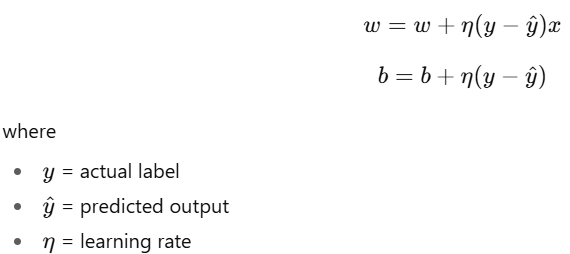

In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=10):
        self.learning_rate = learning_rate#learning_rate: how much to adjust weights when an error occurs,epochs: how many times to iterate over the entire dataset.
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def step_function(self, x):
        return np.where(x >= 0, 1, 0)#If the weighted sum ≥ 0 ⇒ output = 1 else 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for i in range(n_samples):
                linear_output = np.dot(X[i], self.weights) + self.bias#computing w.x+b and then applying step fn to get 0/1
                y_pred = self.step_function(linear_output)
                update = self.learning_rate * (y[i] - y_pred)
                self.weights += update * X[i]
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.step_function(linear_output)


#AND Gate
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y_and = np.array([0,0,0,1])
p_and = Perceptron()
p_and.fit(X, y_and)
print("AND Predictions:", p_and.predict(X))

#OR Gate
y_or = np.array([0,1,1,1])
p_or = Perceptron()
p_or.fit(X, y_or)
print("OR Predictions:", p_or.predict(X))

#XOR Gate (not linearly separable, will fail intentionally)no single straight line can divide 1s and 0s we need at least two layers (an MLP)
y_xor = np.array([0,1,1,0])
p_xor = Perceptron()
p_xor.fit(X, y_xor)
print("XOR Predictions:", p_xor.predict(X))


AND Predictions: [0 0 0 1]
OR Predictions: [0 1 1 1]
XOR Predictions: [1 1 0 0]


3.)MLP (Multi-Layer Perceptron) with Single Hidden Layer
Given:
weights = [0, 1]
bias = 0
x = [2, 3]
sigmoid(z) = 1 / (1 + exp(-z))

Step 1: hidden neuron h1
 total_h1 = 0*2 + 1*3 + 0 = 3
 out_h1 = sigmoid(3) = 1 / (1 + e^(-3)) = 0.9525741268224334

Step 2: hidden neuron h2 (same weights)
 total_h2 = 3
 out_h2 = sigmoid(3) = 0.9525741268224334

Step 3: output neuron o1 (inputs = [out_h1, out_h2])
 total_o1 = 0*out_h1 + 1*out_h2 + 0 = 0.9525741268224334
 out_o1 = sigmoid(total_o1) = sigmoid(0.9525741268224334)
        = 1 / (1 + e^(-0.9525741268224334)) = 0.7216325609518421

Final network output: 0.7216325609518421


In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

class OurNeuralNetwork:
    """
    Neural Network with:
    - 2 input neurons
    - 2 hidden neurons (h1, h2)
    - 1 output neuron (o1)
    """
    def __init__(self):
        weights = np.array([0, 1])
        bias = 0
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)

    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        return out_o1

# Example
network = OurNeuralNetwork()
x = np.array([2, 3])
print("Network output:", network.feedforward(x))


Network output: 0.7216325609518421


MNIST MLP(Multi-Layer perceptron) Classifier

In [ ]:
from sklearn.datasets import fetch_openml                # To load the MNIST dataset
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
# fetch_openml downloads the dataset from OpenML
# 'mnist_784' → dataset name (contains 70,000 images of digits, each 28x28 = 784 pixels)
# version=1 → dataset version
# return_X_y=True → directly returns features (X) and labels (y) separately
data, labels = fetch_openml('mnist_784', version=1, return_X_y=True)

# Each pixel value ranges from 0 to 255 — normalizing them to 0–1 for faster training
data = data / 255.0
# Split the dataset into training and testing sets
# random_state=42 → ensures reproducibility (same random split each run)
# stratify=labels → ensures equal class distribution in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.1, random_state=42, stratify=labels
)

# Initializing the Multi-Layer Perceptron (MLP)
mlp = MLPClassifier(
    hidden_layer_sizes=(50,),   # One hidden layer with 50 neurons
    max_iter=50,                # Maximum 50 training iterations (epochs)
    verbose=True,               # Prints training progress and loss values
    random_state=1              # For reproducibility of weight initialization
)
# Train the model (Backpropagation)
# .fit() automatically performs:
#   - Forward pass → calculates outputs
#   - Backward pass → adjusts weights using gradient descent
#   - Repeats for 'max_iter' epochs
mlp.fit(X_train, y_train)
# .predict() → predicts labels for test set
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Iteration 1, loss = 0.50240991
Iteration 2, loss = 0.24293823
Iteration 3, loss = 0.19396647
Iteration 4, loss = 0.16213879
Iteration 5, loss = 0.14071148
Iteration 6, loss = 0.12341883
Iteration 7, loss = 0.10922166
Iteration 8, loss = 0.09774355
Iteration 9, loss = 0.08919639
Iteration 10, loss = 0.08139225
Iteration 11, loss = 0.07540877
Iteration 12, loss = 0.06954664
Iteration 13, loss = 0.06361726
Iteration 14, loss = 0.05979103
Iteration 15, loss = 0.05585580
Iteration 16, loss = 0.05202626
Iteration 17, loss = 0.04899432
Iteration 18, loss = 0.04561763
Iteration 19, loss = 0.04281492
Iteration 20, loss = 0.04050308
Iteration 21, loss = 0.03787670
Iteration 22, loss = 0.03558628
Iteration 23, loss = 0.03292704
Iteration 24, loss = 0.03132445
Iteration 25, loss = 0.02988745
Iteration 26, loss = 0.02857582
Iteration 27, loss = 0.02623057
Iteration 28, loss = 0.02454969
Iteration 29, loss = 0.02335991
Iteration 30, loss = 0.02190347
Iteration 31, loss = 0.02054652
Iteration 32, los

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
